In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [3]:
train_set = torchvision.datasets.MNIST('./data',
    download=False,
    train=True,
    transform=transform)
print(' Number of training data ', len(train_set))

 Number of training data  60000


In [4]:
test_set = torchvision.datasets.MNIST('./data',
    download=False,
    train=False,
    transform=transform)
print(' Number of testing data ',len(test_set))

 Number of testing data  10000


In [5]:
BATCH_SIZE = 512

In [7]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

In [8]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

In [11]:
CLASSES = train_loader.dataset.classes
print(CLASSES)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [12]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [13]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=784).to(device)

# create an optimizer object
# Adam optimizer with learning rate 0.001
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [15]:
epochs = 50

In [16]:
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/50, loss = 0.921596
epoch : 2/50, loss = 0.906415
epoch : 3/50, loss = 0.899758
epoch : 4/50, loss = 0.896176
epoch : 5/50, loss = 0.893729
epoch : 6/50, loss = 0.892534
epoch : 7/50, loss = 0.891891
epoch : 8/50, loss = 0.891501
epoch : 9/50, loss = 0.891104
epoch : 10/50, loss = 0.890768
epoch : 11/50, loss = 0.890467
epoch : 12/50, loss = 0.890121
epoch : 13/50, loss = 0.889879
epoch : 14/50, loss = 0.889713
epoch : 15/50, loss = 0.889616
epoch : 16/50, loss = 0.889556
epoch : 17/50, loss = 0.889425
epoch : 18/50, loss = 0.889340
epoch : 19/50, loss = 0.889267
epoch : 20/50, loss = 0.889159
epoch : 21/50, loss = 0.889136
epoch : 22/50, loss = 0.889038
epoch : 23/50, loss = 0.889007
epoch : 24/50, loss = 0.889023
epoch : 25/50, loss = 0.888911
epoch : 26/50, loss = 0.888848
epoch : 27/50, loss = 0.888806
epoch : 28/50, loss = 0.888746
epoch : 29/50, loss = 0.888737
epoch : 30/50, loss = 0.888721
epoch : 31/50, loss = 0.888710
epoch : 32/50, loss = 0.888730
epoch : 33/50, lo

In [18]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([512, 1, 28, 28])


<Figure size 432x288 with 0 Axes>

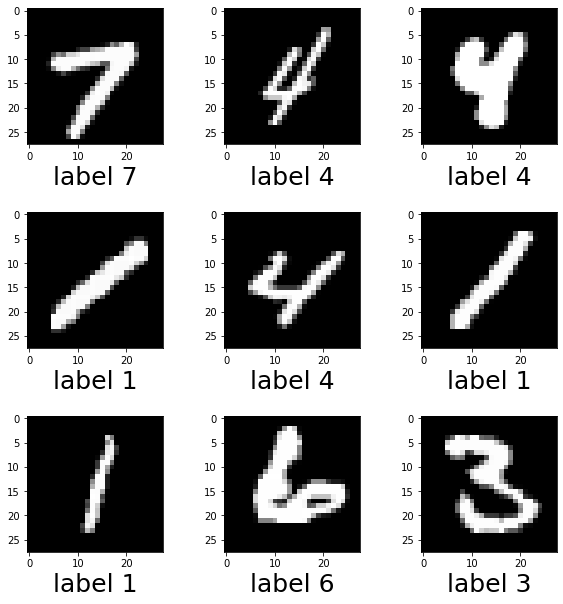

In [30]:
plt.figure()
plt_row = 3
plt_col = 3
fig, axes = plt.subplots(plt_row, plt_col, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
counter = 0
for i in range(plt_row):
    for j in range(plt_col):
        image = np.transpose(images[counter].numpy(), (1, 2, 0))
        axes[i][j].imshow(image, cmap='gray')
        axes[i][j].set_xlabel("label {label}".format(label = labels[counter]),fontsize=25 )
        counter = counter + 1
plt.show()